 # Project 3: GDP and life expectancy Extended

Main Project: To Find Any Correlation Between GDP and Life Expectancy.

Activity: To Find Any Correlation Between GDP Per Capita and Life Expectancy.

Redo Activity: To Find Any Correlation Between GDP Per Capita and Life Expectancy with NY.GDP.PCAP.PP.CD

Questions to be Answered:

Q1) To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?

Q2) Which are the two countries in the right half of the plot (higher GDP) with life expectancy below 60 years? 

Q3) What factors could explain their lower life expectancy compared to countries with similar GDP? 
    Hint: use the filtering techniques you learned in Week 2 to find the two countries.

Activity:

Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook exercises, you already have a column with the population data. 

Hint: write an expression involving the GDP and population columns, as you learned in Calculating over columns in Week 1.

Think about the units in which you display GDP per capita. Redo the analysis using the indicator suggested at the end of the project notebook. Create your own project If you have more time, create a completely new project and choose another two of the hundreds of World Bank indicators and see if there is any correlation between them. If there is a choice of similar indicators, choose one that leads to meaningful comparisons between countries.  NY.GDP.PCAP.PP.CD

Look at the results you obtained and take a few moments to assess how they differ from mine.

For the current project we need 3 indicators GDP, Life expectancy and Population

In [1]:
import pandas as pd

In [2]:
#Main Project
#GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = pd.read_csv(r'C:\Users\Jojo3\Downloads\Week 6\WB GDP 2013.csv')

#LIFE_INDICATOR = 'SP.DYN.LE00.IN'
life = pd.read_csv(r'C:\Users\Jojo3\Downloads\Week 6\WB LE 2013.csv')

#Activity
#POPULATION_INDICATOR ='SP.POP.TOTL'
pop = pd.read_csv(r'C:\Users\Jojo3\Downloads\Week 6\WB POP 2013.csv')

#Redo Activity
#GDP_PER_CAPITA_INDICATOR = 'NY.GDP.PCAP.PP.CD'
GdpCap = pd.read_csv(r'C:\Users\Jojo3\Downloads\Week 6\WB GDP PER CAPITA 2013.csv')

# Cleaning

The dropna() method removes the rows that contains NULL values. 

In [3]:
drop34 = gdp[34:].dropna()

In [4]:
gdp_dropna = drop34.dropna()

In [5]:
life_dropna =life.dropna()

In [6]:
pop_dropna =pop.dropna()

The drop() method removes the specified row or column.

In [7]:
gdpCdrop = gdp_dropna.drop(columns=['year'])

In [8]:
lifeCdrop = life_dropna.drop(columns=['year'])

In [9]:
popCdrop = pop_dropna.drop(columns=['year'])

The rename() function is used to alter axes labels.

In [10]:
gdpClean = gdpCdrop.rename(columns = {'NY.GDP.MKTP.CD':'GDP'})

In [11]:
lifeClean = lifeCdrop.rename(columns = {'SP.DYN.LE00.IN':'Life'})

In [12]:
popClean = popCdrop.rename(columns = {'SP.POP.TOTL':'Population'})

Notes of Cleaning

Each data set has 3 columns country, year and there respective indicators. The step 1 was removing all NULL values from the data set, so used dropna() to remove the NULL values. Then step 2 was removing unwanted column used drop() to remove year column from the dataframe. The step 3 was renaming the column of the indicators, rename using rename() and renamed to respective Indicators. So the Cleaning process was of 3 Steps.

# Transformation



Part 1: Convertion & Rounding.

Part 2: Extracting Columns.

In [13]:
# Function for Rounding the Millions & Convert to USD to GBP
def roundToMillions(capital):
    rm = round(capital / 1000000)
    usdToGbp = rm/1.564768
    return usdToGbp

In [14]:
# Function for Rounding the Population to Millions
def roundPopulationToMillions(population):
    rp = round(population / 1000000) * 1000000
    return rp 

In [15]:
gdpClean['GDP (£m)'] = gdpClean['GDP'].apply(roundToMillions).apply(round)

In [16]:
lifeClean['Life Expectancy'] = lifeClean['Life'].apply(round)

In [17]:
popClean['Populations'] = popClean['Population'].apply(roundPopulationToMillions)

In [18]:
#GDP
COUNTRY = 'country'
GDP = 'GDP (£m)'
headings = [COUNTRY,GDP]
GDP_CT = gdpClean[headings]

In [19]:
#LIFE
COUNTRY = 'country'
LIFE = 'Life Expectancy'
headings = [COUNTRY,LIFE]
LIFE_CT = lifeClean[headings]

In [20]:
#POPULATION
COUNTRY = 'country'
POP = 'Populations'
headings = [COUNTRY,POP]
POP_CT = popClean[headings]

Notes of Transformation

The Transformation was divided into two parts.
Part 1 was Converting and Rounding Values. Converted the USD to GBP by using function. Then Rounded the GDP, Population and Life expectancy using round() and user created function.
Part 2 was extracting wanted columns from the new data frames, used headings to extract the columns and named as them as new variable for each Indicators. The round() function returns a floating point number that is a rounded version of the specified number

# Combining 

In [21]:
# Aim of combining is to find relation between GDP and Life Expectancy
GdpVsLife = pd.merge(GDP_CT,LIFE_CT, on = COUNTRY, how = 'inner')

Notes of Combining
To find the relation between two columns data we need to merge it. To Combine the two different columns we used merge().
The merge() method updates the content of two DataFrame by merging them together.

# Correlation 

Correlation refers to the relationship between two variables. It measures the degree to which changes in one variable are associated with changes in another variable.

+1 indicates positive correlation ( means that as one variable increases, the other also increases)

-1 indicates negative correlation ( means that as one variable increases, the other decreases)

 0 indicates no correlation between two variables.
 
 
 It's important to note that correlation does not imply causation. Causation refers to a relationship between two variables in which one variable directly affects the other. Correlation only measures the strength of the relationship between the variables, but it does not establish a cause-and-effect relationship.

In [22]:
from scipy.stats import spearmanr

In [23]:
# GDP Vs LIFE
gdpColumn = GdpVsLife[GDP]
lifeColumn = GdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


Statistical significance refers to the probability that an observed result in a statistical analysis. statistically significant means there is strong chance of while, not statistically significant means there is weak chance of. That doesn't means that both are true. A statistically significant result means that the observed effect is unlikely to be due to chance and is likely to be a real effect in the population. A not statistically significant result means that the observed effect could be due to chance, and it is not possible to conclude with confidence that there is a real effect in the population.To establish causation, we need to conduct further research, such as experimental studies, to determine if one variable is causing changes in the other variable.

# Plotting 

Measures of correlation can be misleading, so it is best to see the overall picture by plotting the data. Data visualization helps people see, interact with, and better understand data, Without data visualization, it is challenging to identify the correlations between the relationship of independent variables.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Life Expectancy'>

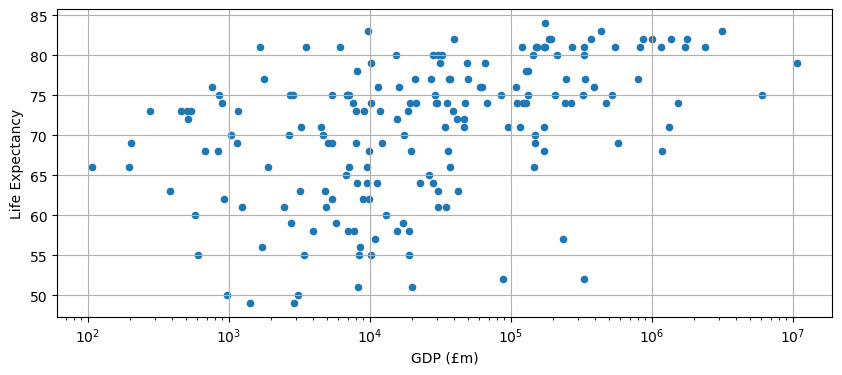

In [24]:
# GDP Vs LIFE
%matplotlib inline
GdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

Since the scatter plot appears to be "all over the place," it generally means that there is a weak or non-existent relationship between the variables being plotted. In other words, the data points appear to be randomly distributed across the plot, without any clear pattern or trend.

Notes of Plotting

Highly skewed data can make it difficult to visualize the relationship between two variables, especially if the range of values is large. Log transformation can help to reduce skewness and bring the data closer to a normal distribution, making it easier to identify patterns and trends in the data.
%matplotlib notebook: will lead to interactive plots embedded within the notebook, you can zoom and resize the figure
%matplotlib inline: only draw static images in the notebook

To make it more clear find 10 countires with lowest GDP and 10 countries with lowest Life Expectancy and graph it with bar graph.

# Q1)
To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?

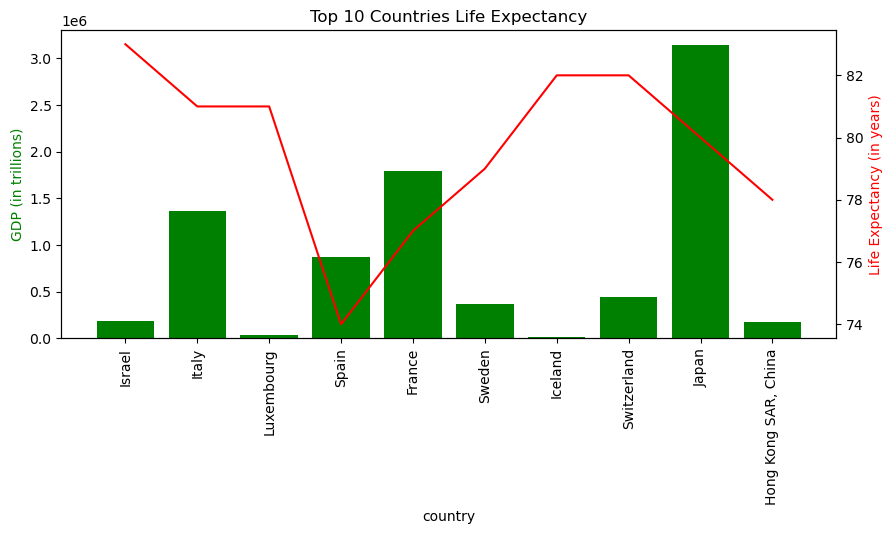

In [48]:
# Top 10 Countries Life Expectancy
top_life = GdpVsLife.sort_values(LIFE).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_life["country"]
y1 = top_life["GDP (£m)"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP (in trillions)", color="green")
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries Life Expectancy")
plt.show()


In [ ]:
# Top 10 Countries GDP
top_gdp = GdpVsLife.sort_values(GDP).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_gdp["country"]
y1 = top_gdp["GDP (£m)"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP (in trillions)", color="green")
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries by GDP")
plt.show()


# Conclusion 
Aim: To Find Any Correlation Between GDP and Life Expectancy.

When we check the Correlation it turns out to be statistically significant to make that sure we plotted a scatter plot graph but the scatter points were all over the place and came to conclusion that there is no relation between GDP and Life Expectancy. But to make sure that our finding a accurate we extaracted TOP 10 Countries that has High GDP and High Life Expectancy. By visualising both Graph now we can come to conclusion that GDP and Life Expectancy has no correlation between each other. It doesn't matter if GDP is high the life expectancy doesn't follow any pattern. Since it is a complex system we cannot analyze based on our one dimensional analysis. When we think about the GDP there should be high Life expectancy but that is not the case. So there are other factors that are affecting the Life expectancy.

# Q2)
Which are the two countries in the right half of the plot (higher GDP) with life expectancy below 60 years?

In [26]:
Q2 = GdpVsLife[(GdpVsLife['GDP (£m)'] <= 10000000) & (GdpVsLife['Life Expectancy'] <= 60)].tail(2)
Q2

,country,GDP (£m),Life Expectancy
184,Zambia,17141,59
185,Zimbabwe,8621,56


# Q3)
What factors could explain their lower life expectancy compared to countries with similar GDP? 

Hint: use the filtering techniques you learned in Week 2 to find the two countries.

Both Zambia amd Zimbabwe are part of African Countries. We have already found out that High GDP doesn't mean that the Life Expecatncy will be hight. Significant factors in life expectancy include gender, genetics, access to health care, hygiene, diet and nutrition, exercise, lifestyle, and crime rates. And Africa is a developing country.

# Activity
The analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook exercises, you already have a column with the population data. To find GDP Capita we need to divide the 
(GDP * 1000000)/Population.

Hint: write an expression involving the GDP and population columns, as you learned in Calculating over columns in Week 1.

# Cleaning

In [27]:
import numpy as np
POP_CT = POP_CT.replace(0, np.nan)
POP_CTC = POP_CT.dropna()

# Combining

In [28]:
# Aim to combine Gdp and Population so find the relation between GDP per capita and Life Expectancy
GdpopVsLife = pd.merge(GdpVsLife,POP_CTC ,on = COUNTRY, how = 'inner')

# Transformation


In [29]:
GdpopVsLife['GDP per capita'] = GdpopVsLife['GDP (£m)'] * 1000000 / GdpopVsLife['Populations']


In [30]:
COUNTRY = 'country'
GDP = 'GDP per capita'
LIFE = 'Life Expectancy'
headings = [COUNTRY,GDP,LIFE]
GDPL = GdpopVsLife[headings]


# Correlation

In [31]:
# GDP per capita Vs LIFE
gdpColumn = GDPL[GDP]
lifeColumn = GDPL[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.8377831350366624
It is statistically significant.


Since it is Statistically significant there is a chance for relation, to make that sure we not to visualize the Dataset

# Plotting

<AxesSubplot:xlabel='GDP per capita', ylabel='Life Expectancy'>

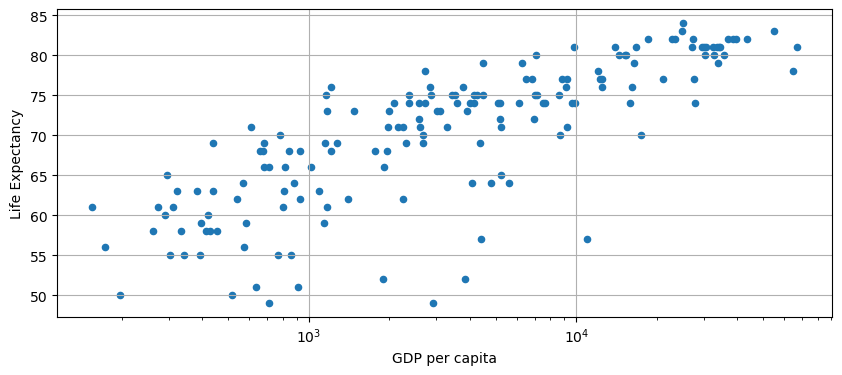

In [32]:
# GDP Vs LIFE
%matplotlib inline
GDPL.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

When compared to the First finding of the scatter plot without GDP per Capita the Gap present in the first plot is lessned but we can't come to a conslusion based on that.

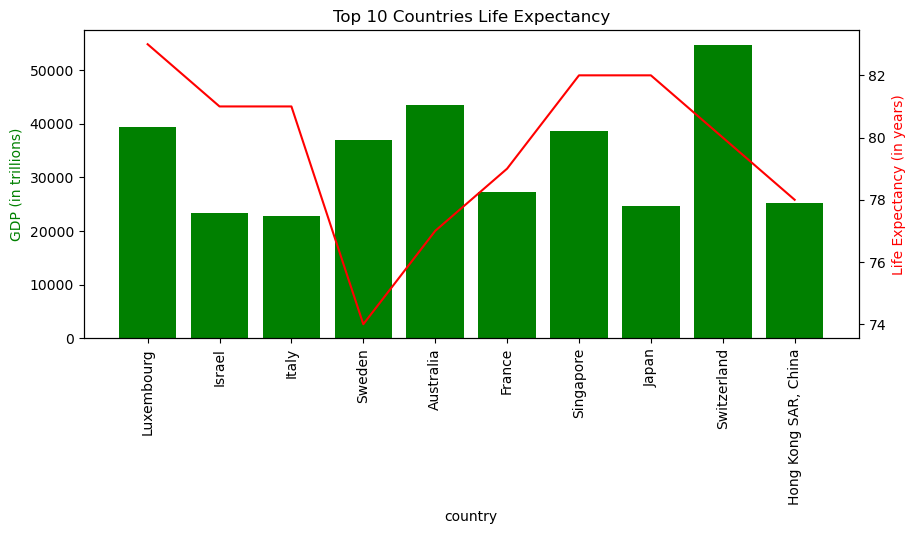

In [47]:
# Top 10 Countries Life Expectancy
top_life = GDPL.sort_values(LIFE).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_life["country"]
y1 = top_life["GDP per capita"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP (in trillions)", color="green")
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries Life Expectancy")
plt.show()


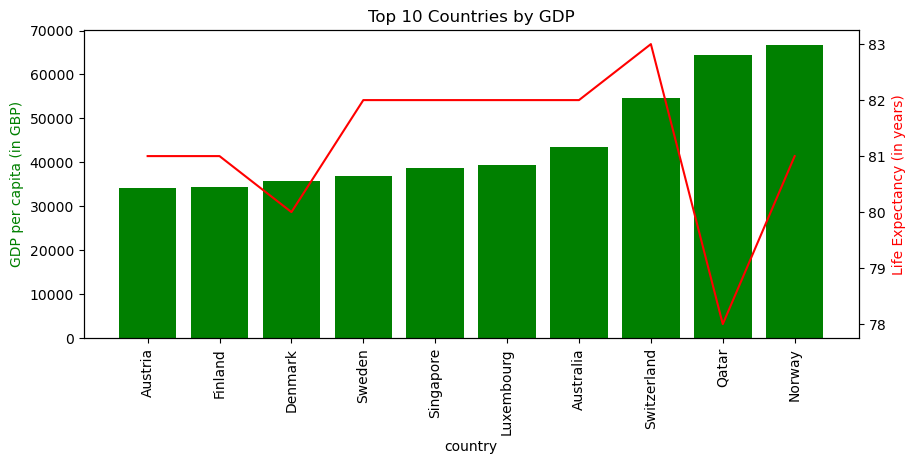

In [34]:
# Top 10 Countries GDP
top_gdp = GDPL.sort_values(GDP).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_gdp["country"]
y1 = top_gdp["GDP per capita"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP per capita (in GBP)", color="green")

# Set the positions and labels for the x-axis ticks
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries by GDP")
plt.show()



# Conclusion
Aim: To Find Any Correlation Between GDP Per Capita and Life Expectancy.

The Graph shows that GDP has nothing to do with Life Expectancy.

# Redo Activity
To Find Any Correlation Between GDP Per Capita and Life Expectancy Orginal GDP Capita Data


# Cleaning

In [35]:
GdpCap_drop = GdpCap.dropna()

In [36]:
GdpCap_drop2 = GdpCap_drop.drop(columns=['year'])

In [37]:
lifeCleanD = lifeClean.drop(columns = ['Life'])

In [38]:
GdpCapClean = GdpCap_drop2.rename(columns = {'NY.GDP.PCAP.PP.CD':'GDP CAP'})

The columns used are new GDP capital and Life Expactancy. Dropped all null values then dropped year and life column, then renamed the column name of the Indicator.

#  Transformation

In [39]:
GdpCapVsLife = pd.merge(GdpCapClean,lifeCleanD, on = COUNTRY, how = 'inner')

In [40]:
COUNTRY = 'country'
GDP = 'GDP CAP'
LIFE = 'Life Expectancy'
headings = [COUNTRY,GDP,LIFE]
GcapVsLife = GdpCapVsLife[headings]


# Correlation

In [41]:
# GDP per capita orginal Vs LIFE
gdpColumn = GcapVsLife [GDP]
lifeColumn = GcapVsLife [LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.8440618727467809
It is statistically significant.


# Plotting

<AxesSubplot:xlabel='GDP CAP', ylabel='Life Expectancy'>

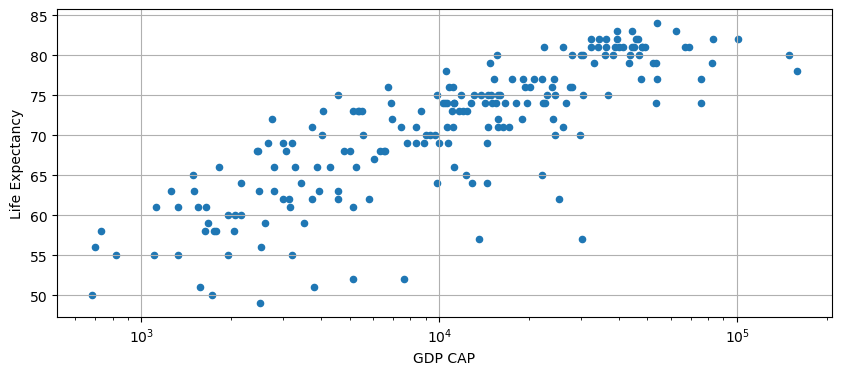

In [42]:
# GDP Vs LIFE
%matplotlib inline
GcapVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

when compared to first and second scatter plot it feels that gaps are more less and feel some trends.

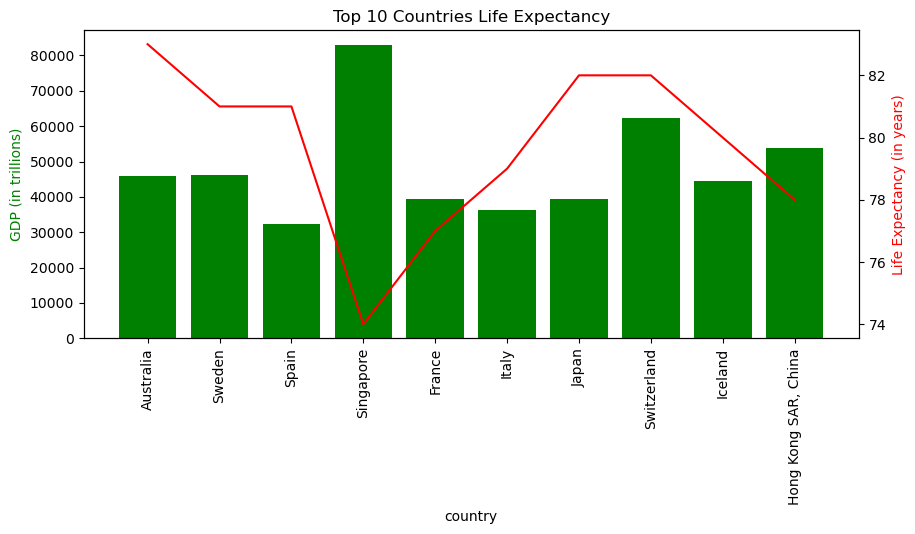

In [46]:
# Top 10 Countries Life Expectancy
top_life = GcapVsLife.sort_values(LIFE).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_life["country"]
y1 = top_life["GDP CAP"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP (in trillions)", color="green")
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries Life Expectancy")
plt.show()


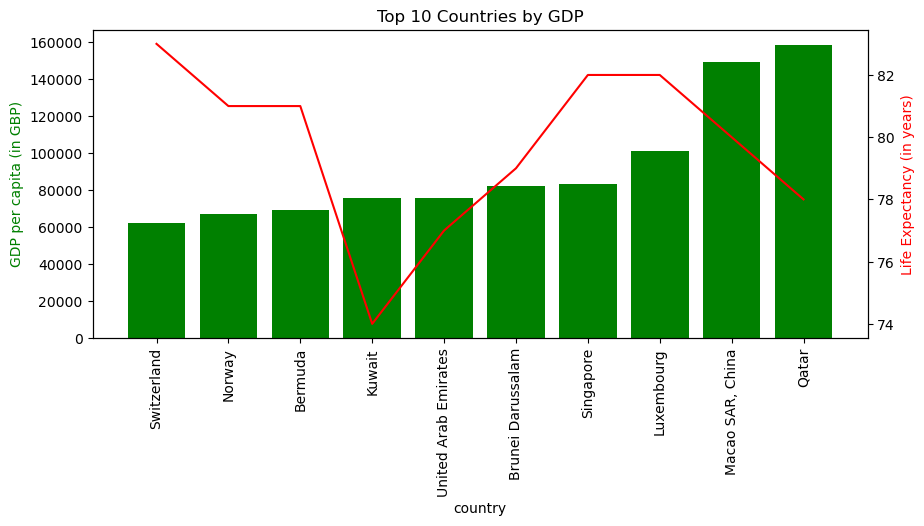

In [45]:
# Top 10 Countries GDP
top_gdp = GcapVsLife.sort_values(GDP).tail(10)
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the GDP values
x = top_gdp["country"]
y1 = top_gdp["GDP CAP"]
ax1.bar(x, y1, color="green")
ax1.set_xlabel("country")
ax1.set_ylabel("GDP per capita (in GBP)", color="green")

# Set the positions and labels for the x-axis ticks
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)

# Create a second y-axis for the life expectancy values
ax2 = ax1.twinx()
y2 = top_gdp["Life Expectancy"]
ax2.plot(x, y2, color="red")
ax2.set_ylabel("Life Expectancy (in years)", color="red")

# Set the title and display the plot
plt.title("Top 10 Countries by GDP")
plt.show()


# Main Project: 
To Find Any Correlation Between GDP and Life Expectancy.

The correlation is 0.5010232389671027

# Activity: 
To Find Any Correlation Between GDP Per Capita and Life Expectancy.

The correlation is 0.8377831350366624

# Redo Activity: 
To Find Any Correlation Between GDP Per Capita and Life Expectancy Orginal data.

The correlation is 0.8440618727467809

# Conclusion

You can see the Correlation changes with different transformed data, There is a big difference in GDP and GDP per capita, but not much a big difference in the calculated GDP Cap and Orginal GDP Cap. But it about the quality of data and what sort of data is using for finding the relaiton. The systme we taking here are more complex than we can imagine. We can't just calculate one aspect of the data and then find relation.There are many factors affecting the relation. The scatter plot is showing some trends as the correlation comes closer to 1. And found out that there are two african countries with High GDP has Low life expectancy. The country with high GDP has life expectancy of 78 where other countries with less GDP has much more. To conclude factors affecting the life expectancy is much more than GDP.